# Data Science Programming Exam (30-05-2025)

**Student Name:** Martin Nilsson

This exam is written using jupyter notebook with a python kernel with `Python version (3.9.21)`. Im using a conda environment identical to the `environment.yml` file provided by the teachers for the previous assignments.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Dataset

In [ ]:
# Get dataset
df = pd.read_csv("exam_2025.csv")

# Clean dataset formatting by removing whitespaces in the columns
df.columns = df.columns.str.strip()
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### 1. Read the data and convert categorical features to numerical. Randomly re-order the data based on your date of birth. 

**As an example**, if you were born on June 1, 2001, your random seed should be 20010601.

In [33]:
# print(df['education'])
# print(df['self_employed'])
# print(df['cibil_score'])


from sklearn.preprocessing import LabelEncoder


df = df.dropna()

new_df = df.copy()

# Create numerical values for categorical features
new_df['education'] = LabelEncoder().fit_transform(new_df["education"])
new_df['self_employed'] = LabelEncoder().fit_transform(new_df["self_employed"])
new_df['loan_status'] = LabelEncoder().fit_transform(new_df["loan_status"])

print("Before shuffle")
display(new_df)

# Reorder data
print("After shuffle")
# Shuffle based on birth date seed
date_of_birth = 20000801
shuffled_df = new_df.sample(frac=1, random_state=date_of_birth)
# Reset index after shuffling if that is desired
shuffled_df = shuffled_df.reset_index(drop=True)
shuffled_df

Before shuffle


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


After shuffle


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2069,0,0,1,2600000,8200000,8,722,3500000,4200000,7100000,3200000,0
1,2897,2,0,0,5400000,17400000,10,335,5900000,1400000,18100000,4300000,1
2,4072,0,0,1,7000000,14000000,4,702,9000000,3100000,21400000,7600000,0
3,1774,2,0,1,5500000,12400000,14,842,-100000,6800000,15800000,5800000,0
4,3151,3,0,0,2100000,7700000,6,703,700000,4000000,8200000,1300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,3443,4,0,0,6900000,20800000,4,839,2600000,2400000,16100000,7400000,0
4265,204,2,0,1,6900000,15600000,6,352,13000000,5300000,22600000,10000000,1
4266,3563,0,0,1,6700000,14900000,16,638,3300000,6900000,22300000,8100000,0
4267,2658,1,1,1,1200000,4800000,6,344,2900000,1700000,3200000,1300000,1


### 2. Based on the value range of each individual feature in the dataset, visualize the five features with the largest range.

loan_id                         4268
no_of_dependents                   5
education                          1
self_employed                      1
income_annum                 9700000
loan_amount                 39200000
loan_term                         18
cibil_score                      600
residential_assets_value    29200000
commercial_assets_value     19400000
luxury_assets_value         38900000
bank_asset_value            14700000
loan_status                        1
dtype: int64


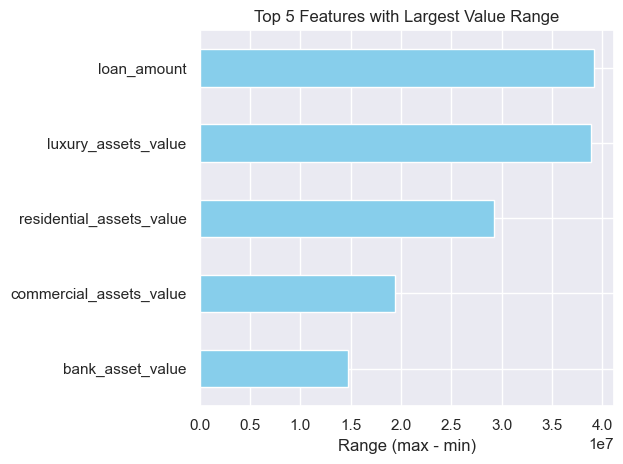

In [38]:
# Compute range (max - min) for each feature
feature_ranges = shuffled_df.max() - shuffled_df.min()
print(feature_ranges)

# Sort by range in descending order and pick the top 5
top5_features = feature_ranges.sort_values(ascending=False).head(5)

# Plot the ranges
top5_features.plot(kind='barh', color='skyblue')
plt.xlabel("Range (max - min)")
plt.title("Top 5 Features with Largest Value Range")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 3.  Use a clustering algorithm based on the features to separate and plot the examples in a two-dimensional space where the true labels, **loan status** should be used to color each example.

Machine Learning

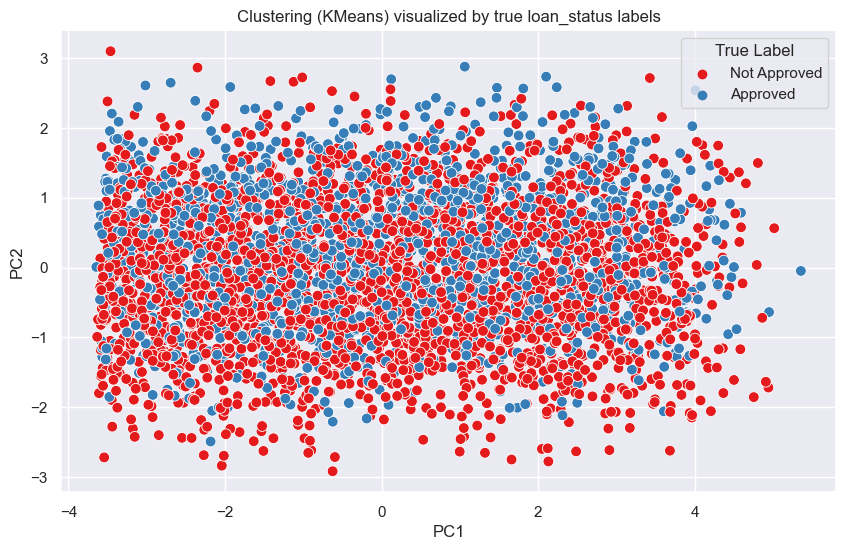

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Drop the target column and prepare feature data
X = shuffled_df.drop("loan_status", axis=1)

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a DataFrame for plotting
plot_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "True Label": shuffled_df["loan_status"],
    "Cluster": clusters
})

# Rename loan_status values
plot_df["True Label"] = plot_df["True Label"].map({
    0: "Not Approved",
    1: "Approved"
})

# Step 6: Plot with seaborn, coloring by true labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="True Label", palette="Set1", s=60)
plt.title("Clustering (KMeans) visualized by true loan_status labels")
plt.grid(True)
plt.show()


Here we can see that "Approved" samples tend to be located more towards a higher value on the PC2 scale, which might indicate that PC2 is capturing a **latent factor** that is positively associated with **loan approval**. This could  be positively impacted by higher income, education, bank_asset_values and more.

While for "Not Approved" the features contributing negatively to PC2 are likely characteristics of rejected applicants wit possibly low income, higher loan_amount, no education and more.

### 4. Here, you will create a **machine-learning** model where the purpose is to **predict** the target. You can do this with any type of machine-learning algorithm that you prefer and an evaluation metric of your choice. You need to carefully select the hyperparameters, for your choice of machine-learning algorithm to get the best possible model. Do a **5-fold cross validation**, to find the best combination of hyperparameters. Motivate how you select the folds and visualize the distribution of the evaluation metric, that you selected, for all different hyperparameter.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation R²: 0.9459682898549687


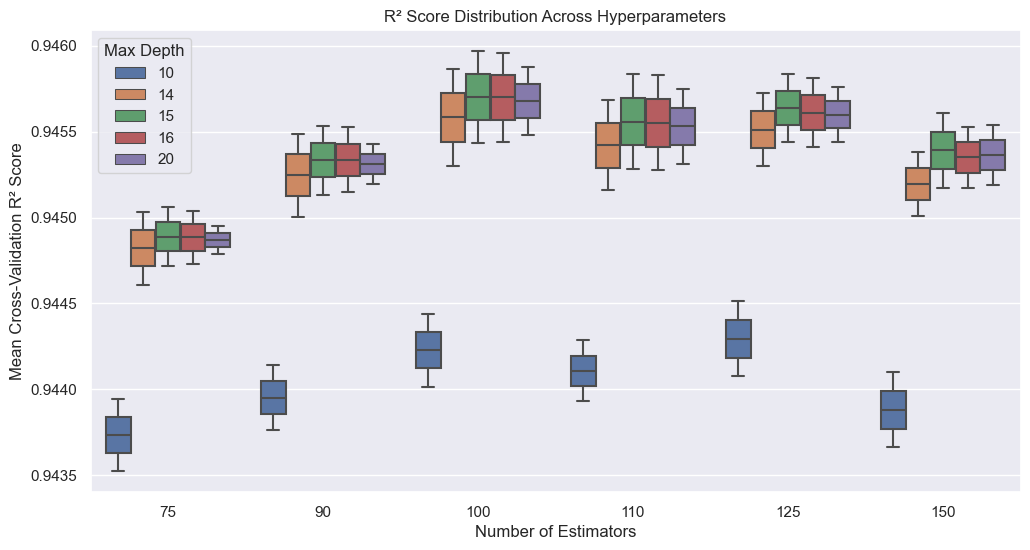

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score

# Features
X = shuffled_df.drop("loan_status", axis=1)
# Labels
y = shuffled_df['loan_status']

# Defining a Random forest model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid to search
param_grid = {
    'n_estimators': [75, 90, 100, 110, 125, 150],
    'max_depth': [None, 10, 14, 15, 16, 20],
    'min_samples_split': [2, 5]
}

# We do 5-fold cross-validation in order to ensure that the model is not trained on certain parts of the
# dataset that might include biases.
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

# r2 scoring metric
scorer = make_scorer(r2_score)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=kf,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X, y)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation R²:", grid_search.best_score_)

# Extract results into a DataFrame for visualization
results_df = pd.DataFrame(grid_search.cv_results_)

# Visualize distribution of test scores for different params
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='param_n_estimators', 
    y='mean_test_score', 
    hue='param_max_depth', 
    data=results_df
)
plt.title('R² Score Distribution Across Hyperparameters')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validation R² Score')
plt.legend(title='Max Depth')
plt.show()


$R^2$ measures how well the regression model explains the variance in the target variable.

I chose some arbitrary numbers of **max depths** in the beginning, which started as **10** and **20**. And by multiple runs adjusted it after seeing the box plot for every run to get the best scores.

Same approach for the **number of estimators**, which started as 'n_estimators': **50, 100, 200**,

### 5. Create a way to divide your data in to an initial training dataset of the first 500 examples in your shuffled dataset and subsequent batches of 100 examples. Subsequent training sets should consist of the previous training set and the next batch of examples. In this case the initial training set size is 1000 examples and each subsequent batch 200 examples. We will call this a *Teaching Schedule*.

In [147]:
def teaching_schedule(data: np.ndarray, initial_size: int, batch_size: int):
    """
    Teaching schedule list of training datasets.

    Parameters:
    - data: full dataset (may already be shuffled)
    - initial_size: size of the initial training dataset
    - batch_size: size of each subsequent batch to add

    Returns:
    - List of indices, each a training set growing by batch_size
    """
    # teaching_sets = []
    
    # # Initial training set
    # start_idx = 0
    # end_idx = initial_size
    # teaching_sets.append(data[start_idx:end_idx].copy())
    
    # # Subsequent batches
    # while end_idx < len(data):
    #     next_end_idx = min(end_idx + batch_size, len(data))
    #     # Extend previous training set by adding next batch
    #     extended_set = data[start_idx:next_end_idx].copy()
    #     teaching_sets.append(extended_set)
    #     end_idx = next_end_idx
        
    # return teaching_sets
    n_samples = X.shape[0]
    teaching_schedule = []

    for i in range(initial_size, n_samples, batch_size):
        teaching_schedule.append(np.arange(0, i))

    # Always include the final full index set
    if teaching_schedule[-1][-1] != n_samples - 1:
        teaching_schedule.append(np.arange(0, n_samples))

    return teaching_schedule


In [148]:
# Example: data is your shuffled pandas DataFrame
initial_size = 1000  # initial training examples
batch_size = 200     # batch size for adding more examples

ts = teaching_schedule(shuffled_df, initial_size, batch_size)

# Iterating over teaching_schedule to see each training set
for i, train_set in enumerate(ts):
    print(f"Training set {i}: {len(train_set)} examples")


Training set 0: 1000 examples
Training set 1: 1200 examples
Training set 2: 1400 examples
Training set 3: 1600 examples
Training set 4: 1800 examples
Training set 5: 2000 examples
Training set 6: 2200 examples
Training set 7: 2400 examples
Training set 8: 2600 examples
Training set 9: 2800 examples
Training set 10: 3000 examples
Training set 11: 3200 examples
Training set 12: 3400 examples
Training set 13: 3600 examples
Training set 14: 3800 examples
Training set 15: 4000 examples
Training set 16: 4200 examples
Training set 17: 4269 examples


### 6. Use the best hyperparamters from question 4 to create models using the *Teaching Schedule* from question 5 to predict all batches of examples, one by one. Visualize your previously selected metric as a function of batch number.

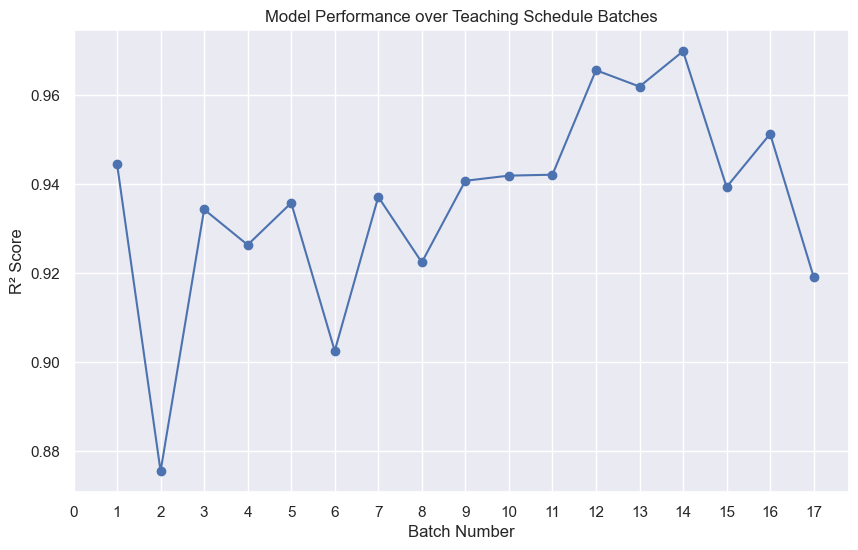

In [155]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# best_params with the best hyperparameters from question 4
best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'random_state': 42,
    'min_samples_split': 2
}

# Features and targets
X = shuffled_df.drop("loan_status", axis=1).to_numpy()
y = shuffled_df['loan_status'].to_numpy()

# Teaching schedule: list of training indices (returned from your create_teaching_schedule function)
# Each element in teaching_schedule is a list or array of indices for training set at that step
ts = teaching_schedule(X, initial_size=1000, batch_size=200)

# Collect evaluation metric in a list for each batch
metrics = []

# For each batch (except the last, since we need a test batch after training)
for i in range(len(ts)-1):
    train_idx = ts[i]
    test_idx = np.setdiff1d(ts[i+1], ts[i])

    # Train the model on current training data
    model = RandomForestRegressor(**best_params)
    model.fit(X[train_idx], y[train_idx])

    # Predict on the new batch
    y_pred = model.predict(X[test_idx])
    
    # Evaluate prediction
    score = r2_score(y[test_idx], y_pred)
    metrics.append(score)

# Plot metric over batches
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(metrics)+1), metrics, marker='o')
plt.xlabel('Batch Number')
plt.ylabel('R² Score')  # Or your metric name
plt.title('Model Performance over Teaching Schedule Batches')
plt.grid(True)
plt.xticks(np.arange(0,18,1))
plt.show()


**I get some weird error here...**

### 7. Do the same as in question 6 except that here you will use a machine-learning method that outputs the probability of one class or the other. Exclude all predicted examples that have a probability within the range 0.2 to 0.8 in future training. Provide a number of the total number of excluded examples.

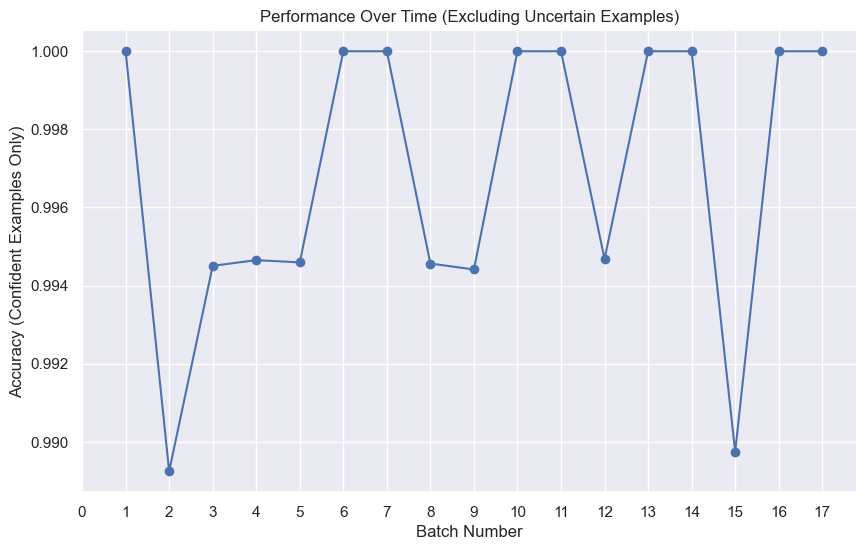

Total excluded examples due to uncertainty: 263


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reset feature matrix and target
X = shuffled_df.drop("loan_status", axis=1).to_numpy()
y = shuffled_df["loan_status"].to_numpy()

best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'random_state': 42,
    'min_samples_split': 2
}

# New teaching schedule
ts = teaching_schedule(X, initial_size=1000, batch_size=200)

# Store metrics and excluded indices
metrics = []
excluded_indices = set()

# Loop over batches
for i in range(len(ts) - 1):
    # Define training and test indices
    train_idx = np.setdiff1d(ts[i], list(excluded_indices))  # exclude uncertain ones from future training
    test_idx = np.setdiff1d(ts[i+1], ts[i])  # new batch only

    if len(train_idx) == 0:
        print(f"Skipped batch {i} due to no training data.")
        continue

    # Train model
    model = RandomForestClassifier(**best_params)

    model.fit(X[train_idx], y[train_idx])

    # Predict probabilities on the new batch
    proba = model.predict_proba(X[test_idx])[:, 1]  # probability for class 1

    # Filter out uncertain predictions (between 0.2 and 0.8)
    uncertain_mask = (proba >= 0.2) & (proba <= 0.8)
    uncertain_indices = test_idx[uncertain_mask]
    excluded_indices.update(uncertain_indices)

    # Predict only on confident ones
    confident_mask = ~uncertain_mask
    confident_idx = test_idx[confident_mask]

    if len(confident_idx) == 0:
        print(f"Skipped evaluation in batch {i} due to no confident predictions.")
        continue

    y_pred = model.predict(X[confident_idx])
    score = accuracy_score(y[confident_idx], y_pred)
    metrics.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(metrics)+1), metrics, marker='o')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy (Confident Examples Only)')
plt.title('Performance Over Time (Excluding Uncertain Examples)')
plt.grid(True)
plt.xticks(np.arange(0,18,1))
plt.show()

# Print excluded count
print(f"Total excluded examples due to uncertainty: {len(excluded_indices)}")


### 8. Assume that a bank will be using your model to determine whether loans should be approved or not. Use the procedure in question 7 to determine how much revenue they will gain by assuming that the exclusion in future training is **100** and that a misclassification is **-1000**.

Total revenue: $289,600
Total excluded examples due to uncertainty: 263


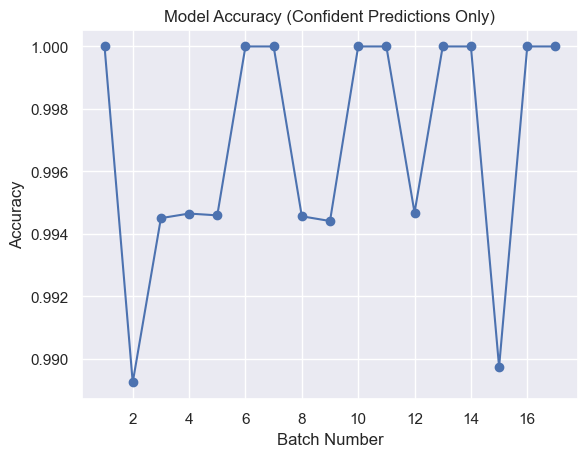

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Set gain/loss values
REWARD_CORRECT = 100
COST_INCORRECT = -1000
excluded_indices = set()

# Reset feature matrix and target
X = shuffled_df.drop("loan_status", axis=1).to_numpy()
y = shuffled_df["loan_status"].to_numpy()

ts = teaching_schedule(X, initial_size=1000, batch_size=200)

total_revenue = 0
metrics = []

for i in range(len(ts) - 1):
    train_idx = np.setdiff1d(ts[i], list(excluded_indices))
    test_idx = np.setdiff1d(ts[i+1], ts[i])  # new batch

    if len(train_idx) == 0:
        print(f"Skipped batch {i} due to no training data.")
        continue

    model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
    model.fit(X[train_idx], y[train_idx])

    # Predict probabilities
    proba = model.predict_proba(X[test_idx])[:, 1]
    uncertain_mask = (proba >= 0.2) & (proba <= 0.8)
    uncertain_idx = test_idx[uncertain_mask]
    excluded_indices.update(uncertain_idx)

    confident_mask = ~uncertain_mask
    confident_idx = test_idx[confident_mask]

    if len(confident_idx) == 0:
        print(f"Skipped evaluation in batch {i} due to no confident predictions.")
        continue

    y_pred = model.predict(X[confident_idx])
    y_true = y[confident_idx]

    # Get masks for the predictions
    correct = (y_pred == y_true)
    incorrect = ~correct

    # Calculate revenue based on reward for correct and cost for incorrect classification
    revenue = (np.sum(correct) * REWARD_CORRECT) + (np.sum(incorrect) * COST_INCORRECT)
    total_revenue += revenue

    acc = accuracy_score(y_true, y_pred)
    metrics.append(acc)

# Final outputs
print(f"Total revenue: ${total_revenue:,}")
print(f"Total excluded examples due to uncertainty: {len(excluded_indices)}")

plt.plot(range(1, len(metrics)+1), metrics, marker='o')
plt.title("Model Accuracy (Confident Predictions Only)")
plt.xlabel("Batch Number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
